# REDSHIFT DISTRIBUTION OF GALAXIES

This test checks different filters for the DES's redshift distribution of galaxies.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sc
from astropy.cosmology import FlatLambdaCDM

In [2]:
import sys

## Load DES-Y1 quantities

* Metadata

In [3]:
nbin = 4
bin_a, bin_b = np.tril_indices(nbin)
bin_a += 1
bin_b += 1

In [5]:
nbinl = 5
binl_a, binl_b = np.tril_indices(nbinl)
binl_a += 1
binl_b += 1

* Cosmology

In [6]:
cosmo = {}
with open('des-y1-test/cosmological_parameters/values.txt') as cosmo_values:
    for line in cosmo_values:
        if line:
            key, val = line.partition('=')[::2]
            cosmo[key.strip()] = float(val)

In [7]:
cosmo_astropy = FlatLambdaCDM(H0=cosmo['hubble'], Ob0=cosmo['omega_b'], Om0= cosmo['omega_m'], Tcmb0=2.7)

* Distance functions

In [8]:
zdM = np.loadtxt('des-y1-test/distances/z.txt')
dM = np.loadtxt('des-y1-test/distances/d_m.txt')

* Redshift distributions

In [9]:
zn = np.loadtxt('des-y1-test/nz_source/z.txt')
nz = [np.loadtxt('des-y1-test/nz_source/bin_%d.txt' % i) for i in range(1, nbin+1)]

In [10]:
xf = np.interp(zn, zdM, dM)

In [11]:
nlz = [np.loadtxt('des-y1-test/nz_lens/bin_%d.txt' % i) for i in range(1, nbinl+1)]

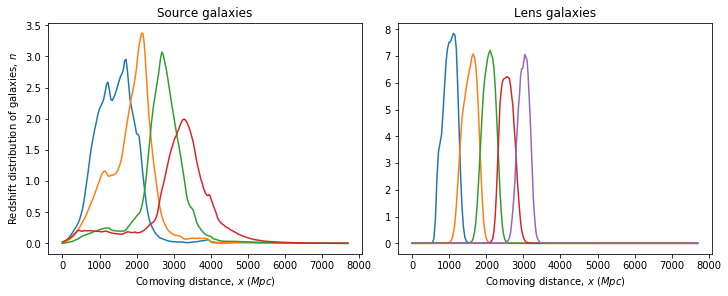

In [21]:
fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True, figsize=(10,4))

ax0.set_title('Source galaxies')
for nn in nz:
    ax0.plot(xf, nn)
    ax0.set_xlabel(r'Comoving distance, $x$ $(Mpc)$')
    ax0.set_ylabel('Redshift distribution of galaxies, $n$')

ax1.set_title('Lens galaxies')
for nn in nlz:
    plt.plot(xf, nn)
    ax1.set_xlabel(r'Comoving distance, $x$ $(Mpc)$')

plt.show()

## Cosmic shear

In [22]:
sys.path.append("../")
from lens_filter import lensing_efficiency

In [23]:
q = [lensing_efficiency(xf, zn, n) for n in nz]

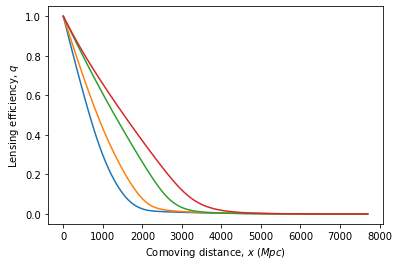

In [24]:
for qq in q:
    plt.plot(xf, qq)
plt.xlabel(r'Comoving distance, $x$ $(Mpc)$')
plt.ylabel('Lensing efficiency, $q$')
plt.show()

### Convergence

In [25]:
sys.path.append("../lensing")
from lens_filter import filter_convergence

In [26]:
fc = [filter_convergence(xf, zn, qq, cosmo_astropy) for qq in q]

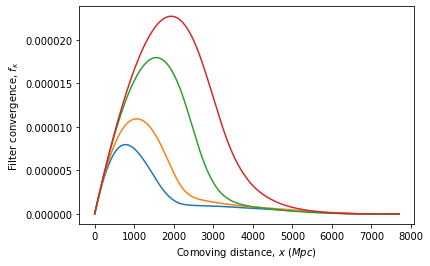

In [27]:
for qq in fc:
    plt.plot(xf, qq)
plt.xlabel(r'Comoving distance, $x$ $(Mpc)$')
plt.ylabel('Filter convergence, $f_{\kappa}$')
plt.show()

### Shear

In [28]:
sys.path.append("../")
from lens_filter import filter_shear

In [29]:
fs = [filter_shear(xf, zn, qq, cosmo_astropy) for qq in q]

../lens_filter.py:217: RuntimeWarning: divide by zero encountered in true_divide
  return factor.value * (1.0 + zx) * lens_efficiency / x


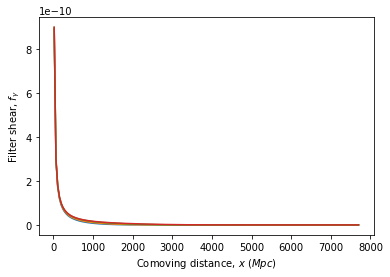

In [30]:
for f in fs:
    plt.plot(xf, f)
plt.xlabel(r'Comoving distance, $x$ $(Mpc)$')
plt.ylabel('Filter shear, $f_{\gamma}$')
plt.show()

## Galaxy

In [31]:
sys.path.append("../lensing")
from lens_filter import filter_galaxy_clustering

In [32]:
fg = [filter_galaxy_clustering(xf, zn, n, 1.0, cosmo_astropy) for n in nlz]

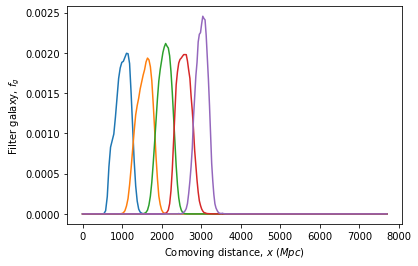

In [33]:
for f in fg:
    plt.plot(xf, f)
plt.xlabel(r'Comoving distance, $x$ $(Mpc)$')
plt.ylabel('Filter galaxy, $f_g$')
plt.show()

### CMB FILTERS

In [39]:
import camb

In [40]:
cosmo = FlatLambdaCDM(H0=67.5, Ob0=0.0483, Om0= 0.3174653243323745)

In [41]:
sys.path.append("../")
from lens_filter import lensing_efficiency_cmb

In [42]:
nz = 100

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965)

results = camb.get_background(pars)
xs = results.conformal_time(0) - results.tau_maxvis

In [43]:
# filter
xf = np.linspace(0., xs, 400)
zf = results.redshift_at_comoving_radial_distance(xf)

In [45]:
qcmb = lensing_efficiency_cmb(xf, xs)

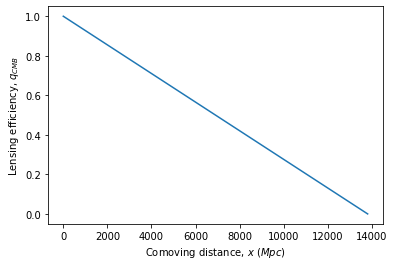

In [46]:
plt.plot(xf, qcmb)
plt.xlabel(r'Comoving distance, $x$ $(Mpc)$')
plt.ylabel('Lensing efficiency, $q_{CMB}$')
plt.show()

In [48]:
fc = filter_convergence(xf, zf, qcmb, cosmo)

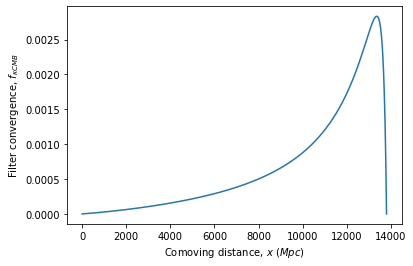

In [49]:
plt.plot(xf, fc)
plt.xlabel(r'Comoving distance, $x$ $(Mpc)$')
plt.ylabel('Filter convergence, $f_{\kappa CMB}$')
plt.show()